In [14]:
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer
import pyproj
import folium
from datetime import datetime
from shapely.geometry import Point,Polygon
from pyproj import Proj, transform
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

In [4]:
boundary = gp.read_file("C:/Users/guswn/Downloads/xn--_-shp-wu9s511b22i5pu95dr8meqcdzb/dc6d83d7-c84e-48b8-b29e-34ce3b86bfa62020328-1-1osfhvj.te5a.shp",encoding='cp949')

In [5]:
seoul=gp.read_file("C:/Users/guswn/Downloads/LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shp",encoding='cp949')

In [6]:
seoul

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,None,11740,125,"POLYGON ((971595.075 1952405.815, 971596.036 1..."
1,11710,송파구,None,11710,126,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
2,11680,강남구,None,11680,127,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
3,11650,서초구,None,11650,128,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
4,11620,관악구,None,11620,129,"POLYGON ((949438.997 1944127.713, 949456.647 1..."
5,11590,동작구,None,11590,130,"POLYGON ((951811.770 1946444.671, 951885.519 1..."
6,11560,영등포구,None,11560,131,"POLYGON ((945280.001 1950949.319, 945361.246 1..."
7,11545,금천구,None,11545,132,"POLYGON ((944705.924 1943086.537, 944706.472 1..."
8,11530,구로구,None,11530,133,"POLYGON ((945165.294 1946679.190, 945362.702 1..."
9,11500,강서구,None,11500,134,"POLYGON ((939006.015 1955916.461, 939036.124 1..."


In [7]:
result = [item for item in seoul["SIG_ENG_NM"] if item[-2:] == 'gu']
str(result)

"['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu', 'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu', 'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu', 'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu', 'Jung-gu', 'Seo-gu', 'Dong-gu', 'Yeongdo-gu', 'Busanjin-gu', 'Dongnae-gu', 'Nam-gu', 'Buk-gu', 'Haeundae-gu', 'Saha-gu', 'Geumjeong-gu', 'Gangseo-gu', 'Yeonje-gu', 'Suyeong-gu', 'Sasang-gu', 'Jung-gu', 'Dong-gu', 'Seo-gu', 'Nam-gu', 'Buk-gu', 'Suseong-gu', 'Dalseo-gu', 'Jung-gu', 'Dong-gu', 'Michuhol-gu', 'Yeonsu-gu', 'Namdong-gu', 'Bupyeong-gu', 'Gyeyang-gu', 'Seo-gu', 'Dong-gu', 'Seo-gu', 'Nam-gu', 'Buk-gu', 'Gwangsan-gu', 'Dong-gu', 'Jung-gu', 'Seo-gu', 'Yuseong-gu', 'Daedeok-gu', 'Jung-gu', 'Nam-gu', 'Dong-gu', 'Buk-gu']"

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

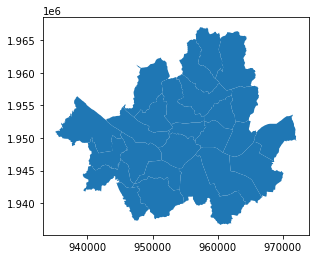

In [7]:
seoul.plot()


In [9]:
seoul = seoul.to_crs(epsg = 4326)

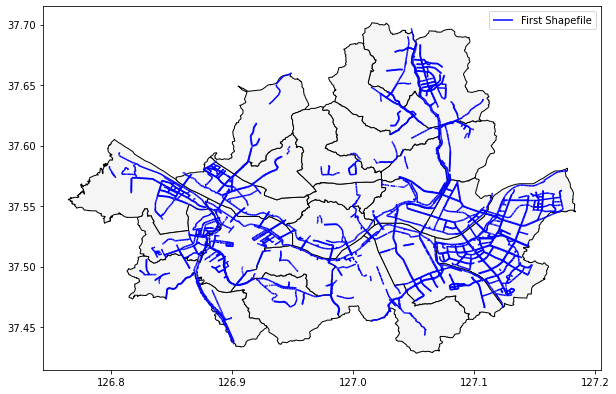

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

# 첫 번째 데이터를 그립니다.
boundary.plot(ax=ax, color='blue', label='First Shapefile')

# 두 번째 데이터를 그립니다.
seoul.plot(ax=ax, color='whitesmoke',edgecolor='black', linewidth=1, label='Second Shapefile')

# 'aspect' 매개변수를 수정합니다.
ax.set_aspect('equal')

# 범례를 추가합니다.
plt.legend()

# plot을 보여줍니다.
plt.show()

In [11]:
print(boundary.crs)
print(seoul.crs)

EPSG:4326
EPSG:4326


In [30]:
gulist = seoul['SIG_ENG_NM'].unique()

In [32]:
gulist

array(['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu',
       'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu',
       'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu',
       'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu',
       'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu',
       'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
      dtype=object)

In [240]:
sum(seoul[seoul["SIG_ENG_NM"]=='Nowon-gu']["geometry"].contains(boundary["geometry"]))

C:\Users\guswn\AppData\Local\Temp\ipykernel_15888\4245913255.py:1: UserWarning: The indices of the two GeoSeries are different.
  sum(seoul[seoul["SIG_ENG_NM"]=='Nowon-gu']["geometry"].contains(boundary["geometry"]))


0

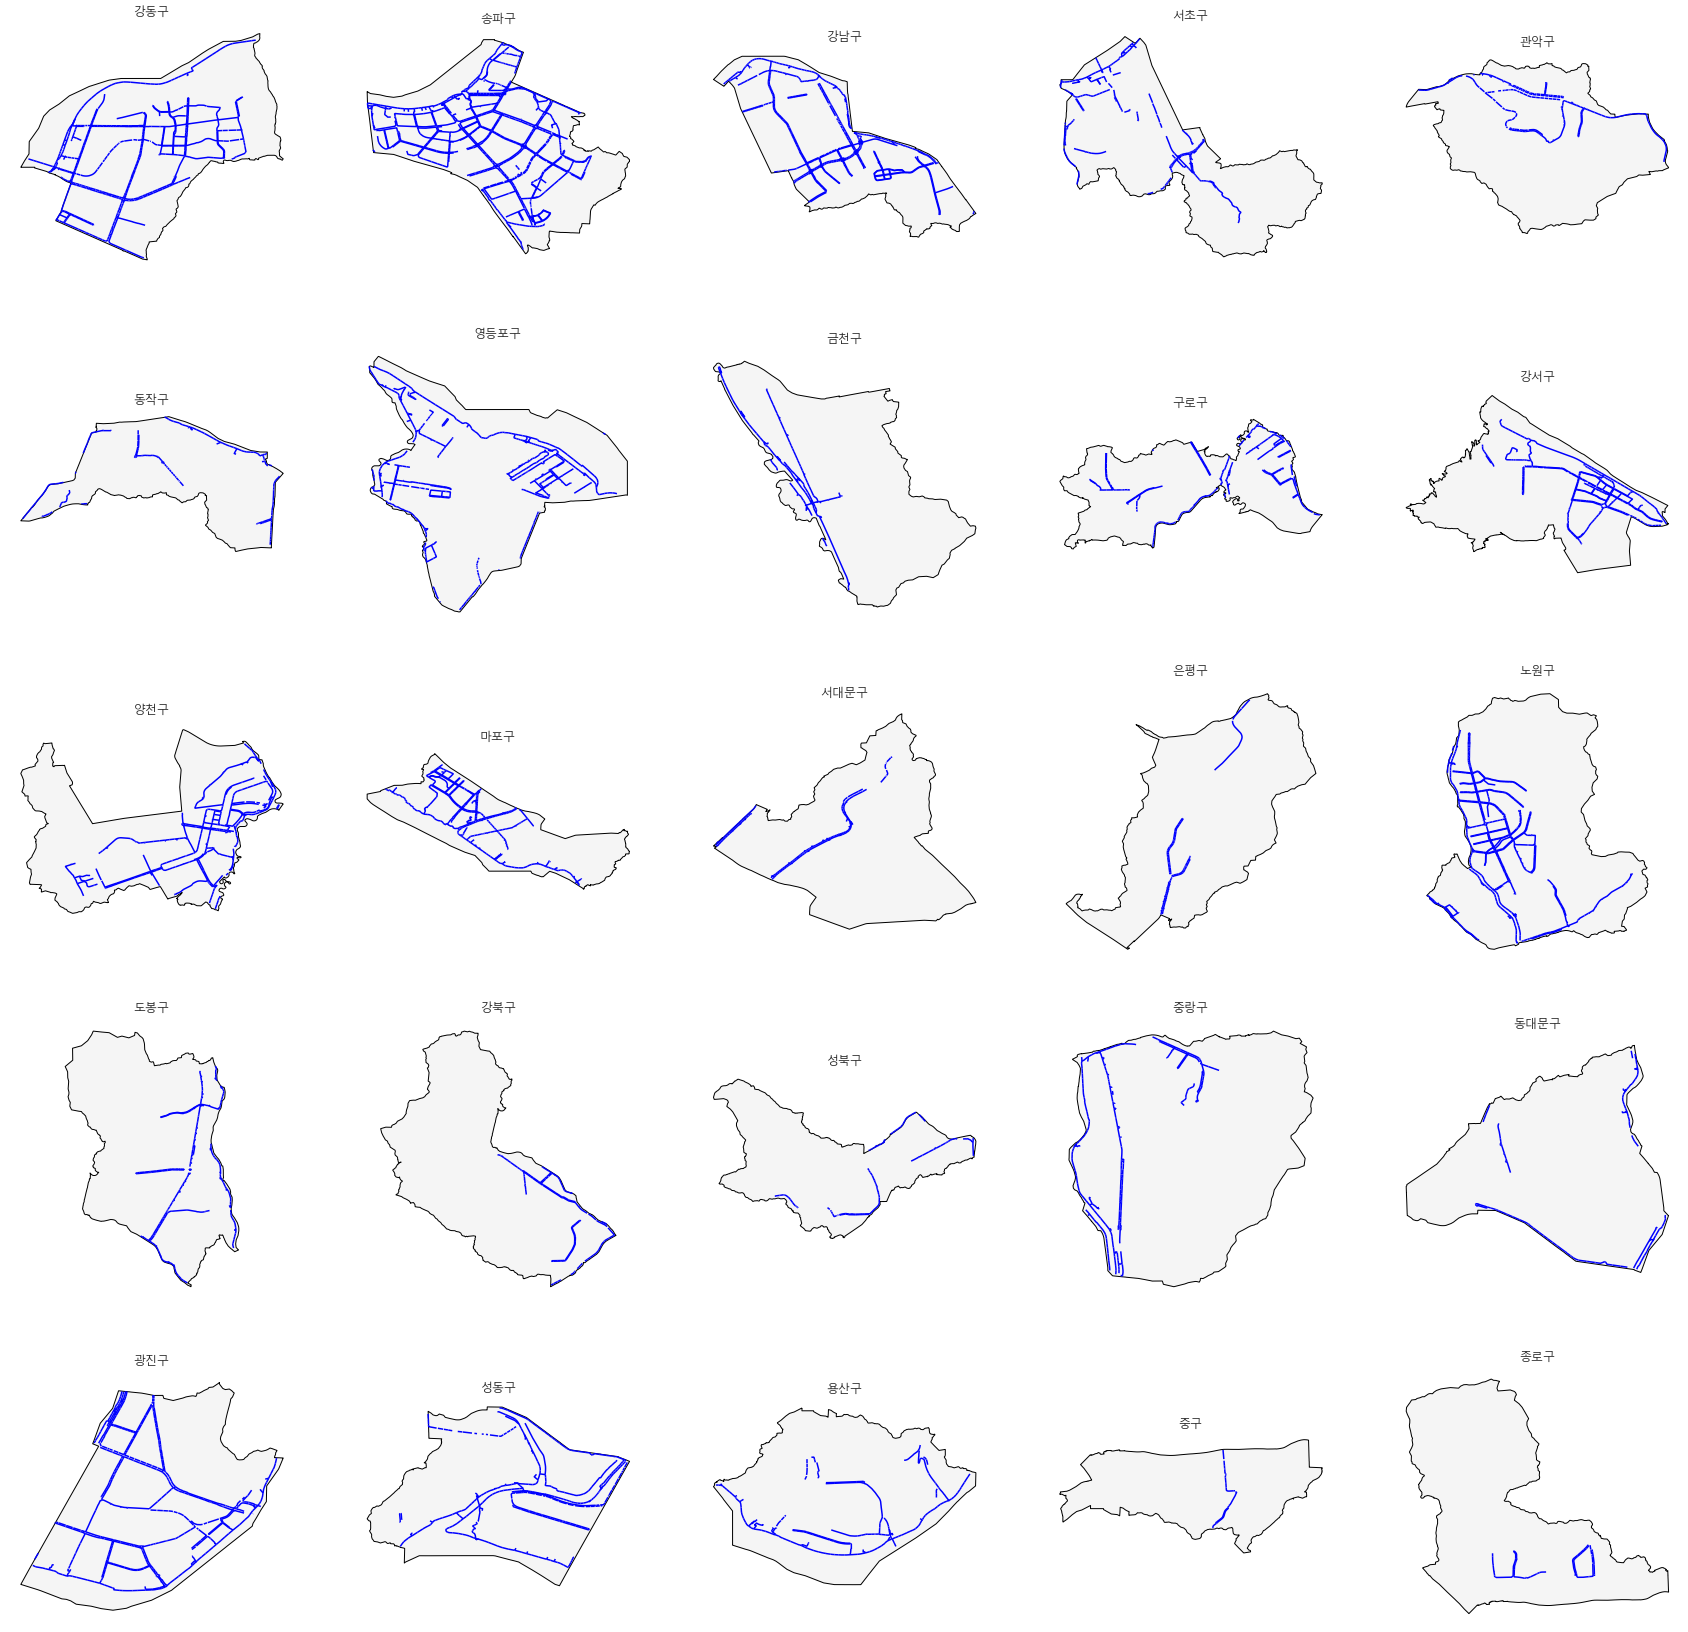

In [15]:
j = 1
plt.figure(figsize = (30,30))
for i in range(25):
    ax = plt.subplot(5,5,j)
    boundary[seoul["geometry"][i].contains(boundary["geometry"])].plot(ax=ax,color='blue')
    seoul.iloc[[i]].plot(figsize=(5,5),color='whitesmoke', edgecolor='black', linewidth=1, ax=ax)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title(seoul["SGG_NM"][i])
    j = j+1
plt.show()

In [25]:
result=0
for i in range(len(seoul["geometry"])):
    result=result+sum(seoul["geometry"][i].contains(boundary["geometry"]))
result

12152

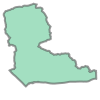

In [143]:
seoul["geometry"][0]

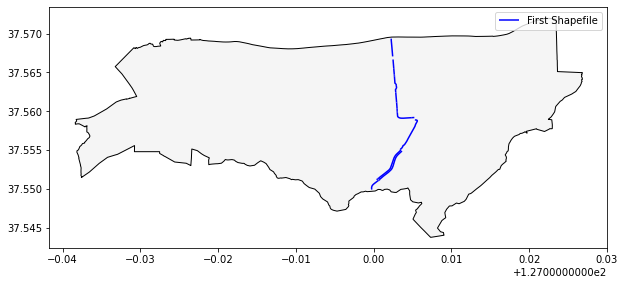

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
boundary[seoul["geometry"][1].contains(boundary["geometry"])].plot(ax=ax, color='blue', label='First Shapefile')
seoul[seoul["SIG_ENG_NM"]=='Jung-gu'].plot(ax=ax, color='whitesmoke',edgecolor='black', linewidth=1, label='Second Shapefile')
ax.set_aspect('equal')
plt.legend()
plt.show()

In [114]:
type(seoul["geometry"][3])

shapely.geometry.polygon.Polygon

In [156]:
seoul.iloc[[0]]

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,b'c1beb7ceb1b8',"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
